In [1]:
from torchvision import datasets, transforms

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
])

# Download and load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download and load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [2]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the neural network
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Input layer (flattened 28x28 image)
        self.fc2 = nn.Linear(256, 128)     # Hidden layer
        self.fc3 = nn.Linear(128, 10)      # Output layer (10 classes)
        self.relu = nn.ReLU()              # Activation function

    def forward(self, x):
        x = x.view(-1, 28 * 28)           # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [7]:
# Define the training loop
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for epoch in range(5):  # Number of epochs
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

# Define the evaluation loop
def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total}%")

# Prepare the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNISTModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate the model
train_model(model, train_loader, criterion, optimizer, device)
evaluate_model(model, test_loader, device)

Epoch 1, Loss: 0.34386446761853023
Epoch 2, Loss: 0.1516591225093457
Epoch 3, Loss: 0.11150150488454427
Epoch 4, Loss: 0.09103843084782727
Epoch 5, Loss: 0.07919793317182812
Test Accuracy: 97.06%


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display random samples with labels and predictions
def show_random_samples(model, data_loader, device, num_samples=5):
    model.eval()  # Set the model to evaluation mode
    samples_shown = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)

            # Convert images to numpy for visualization
            images = images.cpu().numpy()
            labels = labels.cpu().numpy()
            predictions = predictions.cpu().numpy()

            for i in range(len(images)):
                if samples_shown >= num_samples:
                    return

                # Display the image
                plt.imshow(images[i].squeeze(), cmap="gray")
                plt.title(f"Label: {labels[i]}, Prediction: {predictions[i]}")
                plt.axis("off")
                plt.show()

                samples_shown += 1

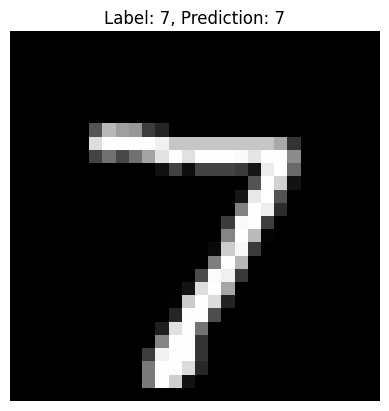

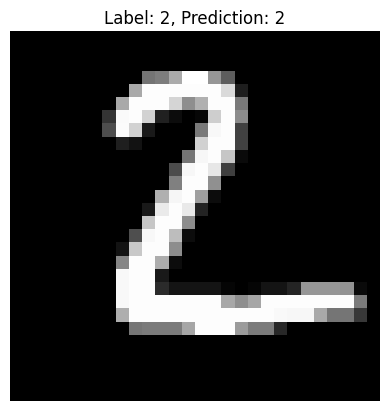

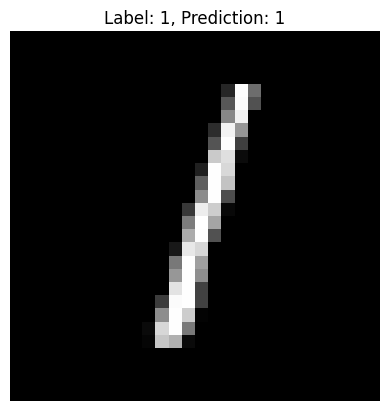

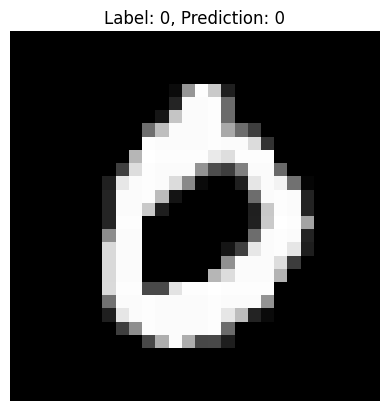

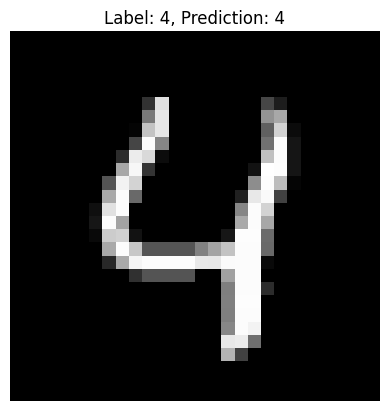

In [9]:
show_random_samples(model, test_loader, device, num_samples=5)

In [7]:
# Basic training loop with L1 Loss
def basic_train_model(model, train_loader, optimizer, device):
    model.train()
    for epoch in range(10):  # Number of epochs
        total_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Flatten the images (for MLP models)
            images = images.view(-1, 28 * 28)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images.float())
            loss = torch.nn.functional.l1_loss(outputs, torch.nn.functional.one_hot(labels, num_classes=10).float())

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

# Basic evaluation loop
def basic_evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Flatten the images (for MLP models)
            images = images.view(-1, 28 * 28)

            # Forward pass
            outputs = model(images.float())
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total}%")

# Prepare the model, optimizer, and device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
basic_model = MNISTModel().to(device)  # Replace with your model
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Basic SGD optimizer

# Train and evaluate the model
basic_train_model(basic_model, train_loader, optimizer, device)
basic_evaluate_model(basic_model, test_loader, device)

Epoch 1, Loss: 0.14690908981856507
Epoch 2, Loss: 0.1469103673786751
Epoch 3, Loss: 0.14691114822811663
Epoch 4, Loss: 0.1469104730371219
Epoch 5, Loss: 0.14690823432034267
Epoch 6, Loss: 0.14690950585962104
Epoch 7, Loss: 0.14691064433693124
Epoch 8, Loss: 0.1469094304165352
Epoch 9, Loss: 0.14690858192408263
Epoch 10, Loss: 0.1469098191970447
Test Accuracy: 12.3%
